# Section 1a

In [478]:
#Pandas is a powerful and open-source Python library. The Pandas library is used for data manipulation and analysis. Pandas consist of data structures and functions to perform efficient operations on data.
#Numpy is a powerful library used in numerical data anlysis, Seaborn and metplotlip are used for data visualization 
#The below importation is required for Feature Engr. and Selection because it involves both series and dataframe analysis, visualization of data and cleaning of data for modeling purposes. 

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import category_encoders as ce
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [533]:
#Reading the Data using pandas Library so as to set the data into a dataframe: 
#Data is uploaded into the Jupiter Notebook Folder titled Capstone Project so that phyton Jupiter Notebook can read the file

Sales_Rec = pd.read_csv('Churn_Modelling_26.csv')


In [534]:
#Confirming that the data has been successfully read by printing the data

Sales_Rec

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [482]:
#To drop the unnamed: 11 coloumn sighted in the dataframe
Sales_Rec.drop(columns=['Unnamed: 11'], errors='ignore', inplace=True)
Sales_Rec

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,Yes,No,0.0


In [483]:
#Checking the Data shape: The below code gives the number of Row and Column, 
#the output signifies that the File Contains 10001 row and 14 coloums
print(Sales_Rec.shape)


(10001, 14)


In [484]:
#Checking the Data Column for each Column using dtypes and printing the coloums names using .columns
print(Sales_Rec.dtypes)
print(Sales_Rec.columns)

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'Churn'],
      dtype='object')


In [485]:
#Converting Object Type to Categorical Type using the astype function
Sales_Rec['Surname']= Sales_Rec['Surname'].astype('category')
Sales_Rec['Geography']= Sales_Rec['Geography'].astype('category')
Sales_Rec['Gender'] = Sales_Rec['Gender'].astype('category') 
Sales_Rec['HasCrCard'] = Sales_Rec['HasCrCard'].astype('category') 
Sales_Rec['IsActiveMember'] = Sales_Rec['IsActiveMember'].astype('category') 

In [486]:
#Checking the Datatype Again after conversion
print(Sales_Rec.dtypes)

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object


# Section 1b: Handling of Missing Values

In [487]:
#Check for Missing Values in all the Columns in the DataFrame
#Since the Tenure columns have more missing value them it is better to deal with the columns first before dropping the missing values for others
#as one missing value will not affect the data accuracy as the percentage for missing value in the other columns is only 0.000001%
#isna helps to print the missing values while sum helps to sum the total missing value in each columns
print(Sales_Rec.isna().sum())

RowNumber           1
CustomerId          1
Surname             1
CreditScore         1
Geography           1
Gender              1
Age                 1
Tenure             11
Balance             1
NumOfProducts       1
EstimatedSalary     1
HasCrCard           1
IsActiveMember      1
Churn               1
dtype: int64


<Axes: ylabel='Tenure'>

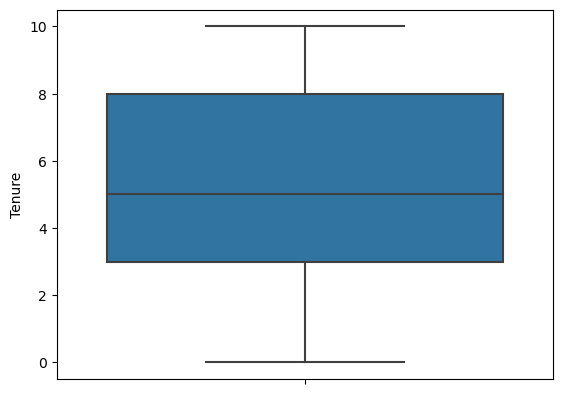

In [488]:
#Finding the means for numerical columns
#Before filling the missing value with the mean it is better to check for outliers first as outliers will ultimately affect the overall mean

sns.boxplot(y='Tenure', data=Sales_Rec)

In [489]:
#From the above the boxplot shows no outliers for the tenure column so we can fill the missing values with any of the central tendency (Mean, Media and Mode)
#As instructed, missing values will be fill with the mean first by printing the mean

Sales_Rec.mean(numeric_only=True)


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012814e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
EstimatedSalary    1.000902e+05
Churn              2.037000e-01
dtype: float64

In [490]:
#Filling the the missing value in Tenure column with the mean
#First Line calculate the mean for the Tenure coloum
#Second line of code round off the mean to Integer
#Third line of code fill the round off mean into the missing values
Sales_RecN = Sales_Rec['Tenure'].mean()
Sales_RecN = round(Sales_Rec['Tenure'].mean())
Sales_Rec['Tenure']=Sales_Rec['Tenure'].fillna(value=Sales_Rec['Tenure'].mean())

In [491]:
#To check if the missing values have been filled you print the mising value again using isna

print(Sales_Rec.isna().sum())

RowNumber          1
CustomerId         1
Surname            1
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             0
Balance            1
NumOfProducts      1
EstimatedSalary    1
HasCrCard          1
IsActiveMember     1
Churn              1
dtype: int64


In [492]:
#From the above output other column still have one null value which the rows can be drop
Sales_Rec.dropna(axis=0, how='any')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,Yes,No,1.0


In [493]:
#To Save the data back to the DataFrame: Inplace return the current analyzed data and store them in the dataframe
Sales_Rec.dropna(inplace=True)

In [494]:
#To Verify the null status after handling all the missing value 
print(Sales_Rec.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Churn              0
dtype: int64


# Section 2a: Checking for Duplicates

In [495]:
#To check for duplicate rows: From the output there are no duplicate rows in the dataframe
Sales_Rec.duplicated().sum()

0

# Section 2b: Checking for outliers

In [496]:
# Boxplot is only conducted for numerical data (FLoat64) type. 
#Box plot using seaborn library to plot will be conducted on CreditScore,NoofProduct,Age,and EstimateSalary columns
#Removal of outliers will be done statistically using the quartile range formula and this will be conducted only on 
#the CreditScore, Age, and NoofProduct as this columns are very important in predicting if a customer will likely leave or stay with the bank

In [497]:
#Boxplot Interpreation: Min Value = approx 370 CreditScore, Max Value=850 CreditScore, Q1(25% of the Data falls below 590-370 CreditScore)
                        #Q3(75% of the data values fall below 850 CreditScore), IQR (Interquantile Range)= 580-710,
                        #Median value approximately at 650 creditscore, IQR and Median indicate normal distribution
                        #Outliers are sighted below 370CreditScore    
            
#There are no outliers present in the EstimatedSalary Column
#NoOfProducts columns has an outliers at 4
#Age has an outlier exisiting for customer whose age falls above 60

In [498]:
#This code snippet creates a 2x2 grid of subplots inside a 10x5-inch figure,giving each subplot a specific location within the grid.
#The plt.tight_layout() call is used to automatically adjust the subplot parameters to give specified padding and prevent overlapping.
#The below will enable the plotting of all the four boxplot in one area (10X5)

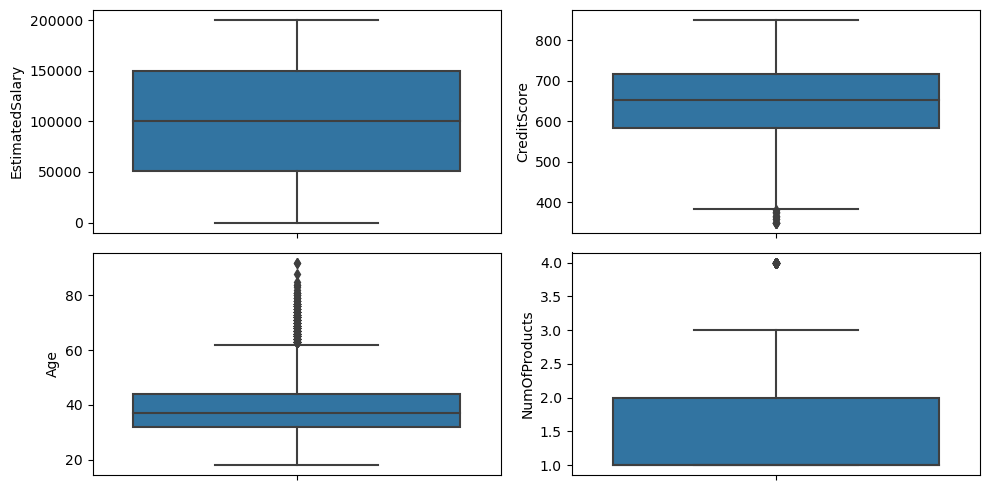

In [499]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.boxplot(y='EstimatedSalary', data=Sales_Rec)

plt.subplot(2,2,2)
sns.boxplot(y='CreditScore', data=Sales_Rec)

plt.subplot(2,2,3)
sns.boxplot(y='Age', data=Sales_Rec)

plt.subplot(2,2,4)
sns.boxplot(y='NumOfProducts', data=Sales_Rec)

plt.tight_layout()
plt.show()

In [500]:
#REMOVAL OF OUTLIERS FROM NECESSARY COLUMNS: From the above plot only creditScore is has valid reasons for outliers to be remvoed because it signifies creditwodiness of a clients
#The below codes helps to calculates the Interquartile Range (IQR) for the CreditScore column in the Sales_Rec DataFrame and then identifies and removes outliers based on the 1.5*IQR rule.

In [501]:
q1=np.quantile(Sales_Rec['CreditScore'],0.25)
q3=np.quantile(Sales_Rec['CreditScore'],0.75)
IQR = q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
Index_list=Sales_Rec.index[(Sales_Rec['CreditScore']<lower_limit) | (Sales_Rec['CreditScore']>upper_limit)]
Sales_Rec=Sales_Rec.drop(Index_list)
print(Sales_Rec.shape)

(9985, 14)


In [502]:
#Resetting index
Sales_Rec.reset_index(inplace=True)

# Section 2c:Countplot

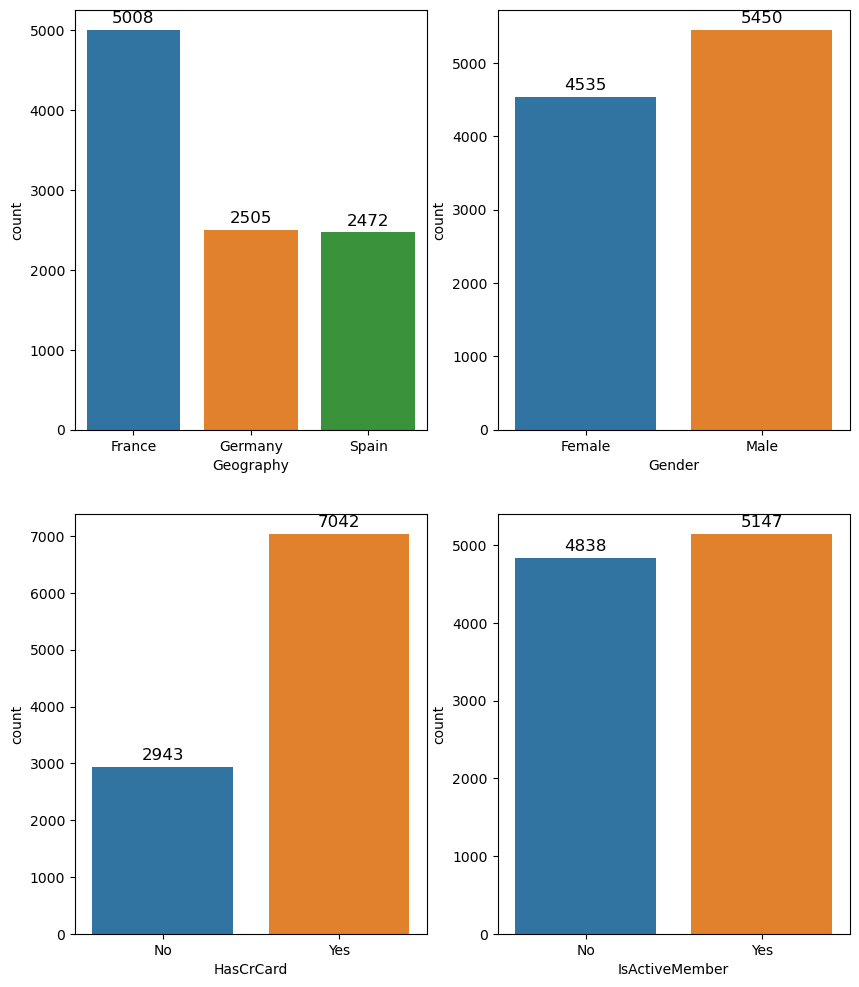

In [503]:
#COUNTPLOT is used for analysis of categorical variable. From the count plot there are four plot with 2x2 grid size and the overall area is 10X8

#The first Plot (Geography): Shows that 50.16% of the bank customer is from Frances so ultimately France geography my also determine the success or failure of the bank
#The second Plot (Gender): The ration of male to female in the bank is just 55:45
#The Thrid plot (HasCrCard): The plot shows that 70.52% of the bank customer has credit card
#The Fourth plot (IsActiveMember): This plot shows that active and inactive members in the bank has no clear differnces. 

#ax is a variable used to hold the countplot
#ax.patches contains all the bars in the plot. 
#p.get_height() returns the height of the bar, which corresponds to the count.
#p.get_x() and p.get_width() help to calculate the x-coordinate of the center of the bar.
#ax.annotate adds the text annotation to each bar. The f'{int(p.get_height())}' formats the count as an integer.
#ha='center' horizontally centers the text annotation.
#va='baseline' vertically aligns the text annotation to the baseline of the bar height.
#xytext=(0, 5) offsets the text position by 5 points in the y-direction to place it slightly above the bar.


plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
ax=sns.countplot(x='Geography', data=Sales_Rec)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.subplot(2,2,2)
ax=sns.countplot(x='Gender', data=Sales_Rec)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.subplot(2,2,3)
ax=sns.countplot(x='HasCrCard', data=Sales_Rec)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.subplot(2,2,4)
ax=sns.countplot(x='IsActiveMember', data=Sales_Rec)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')


# Section 2d: Histogram and skewness

C:\Users\ofonn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Frequency')

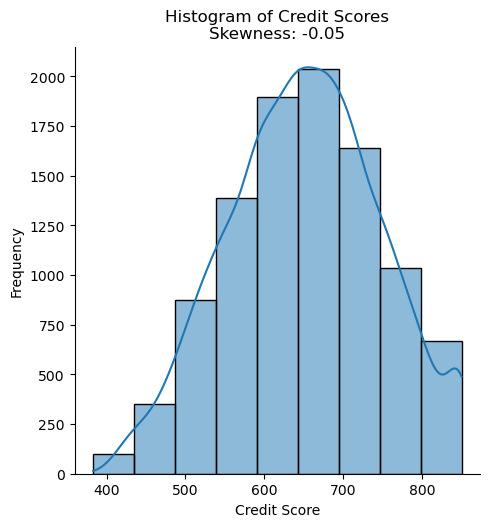

In [504]:
#Histogram is use to analyze the distribution of a dataset and calculate its skewness
#Right Skewed is Positively skewed with positive Value while left skewed is Negatively skewed with negative value
#CreditScore is negatively skewed.
sns.displot(data=Sales_Rec, x='CreditScore', bins=9, kde=True)
credit_score_skewness = Sales_Rec['CreditScore'].skew()

# Add skewness information to the plot
plt.title(f'Histogram of Credit Scores\nSkewness: {credit_score_skewness:.2f}')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

C:\Users\ofonn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Frequency')

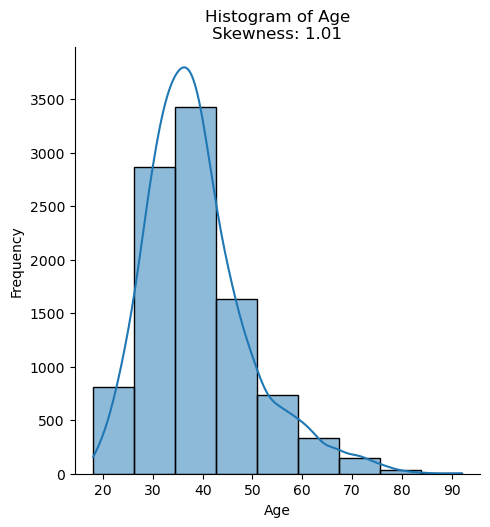

In [505]:
sns.displot(data=Sales_Rec, x='Age', bins=9, kde=True)
Age_skewness = Sales_Rec['Age'].skew()

# Add skewness information to the plot
plt.title(f'Histogram of Age\nSkewness: {Age_skewness:.2f}')
plt.xlabel('Age')
plt.ylabel('Frequency')

C:\Users\ofonn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Frequency')

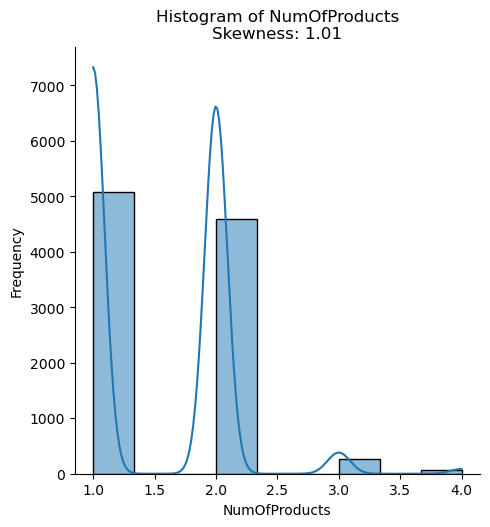

In [506]:
#From the histogram for number of products, the plot is not required. 
sns.displot(data=Sales_Rec, x='NumOfProducts', bins=9, kde=True)
NumOfProducts_skewness = Sales_Rec['NumOfProducts'].skew()

# Add skewness information to the plot
plt.title(f'Histogram of NumOfProducts\nSkewness: {Age_skewness:.2f}')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')


# Section 3a:  Joint plot with hue

Text(0.5, 1.03, 'Jointplot of Credit Score vs Age with Hue by Geography')

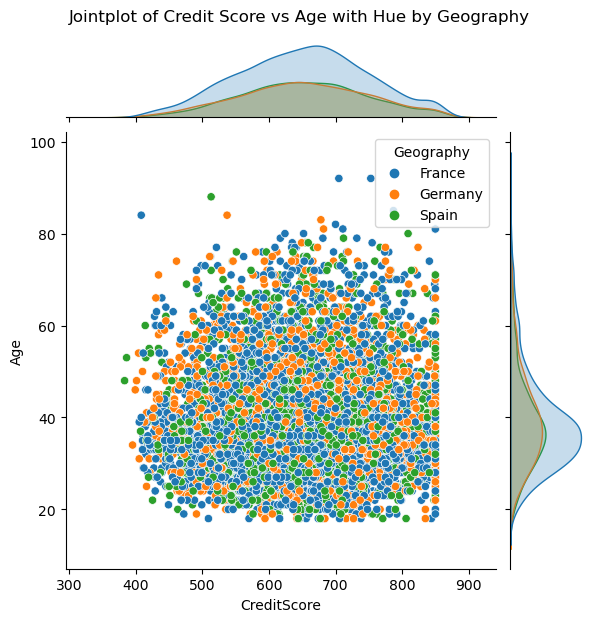

In [507]:
#Jointplot is use to visualize the relationship between two variables, while also distinguishing different categories within the data.
#the below plot shows that the bank has more customer in france and the highest age is also from frances the the chart also shows the the age ranged for all the their geography is centered around 20-60 years old
sns.jointplot(data=Sales_Rec, x='CreditScore', y='Age', hue='Geography', kind='scatter')
plt.suptitle('Jointplot of Credit Score vs Age with Hue by Geography', y=1.03)

# Section 3b:  Scatter plot with hue

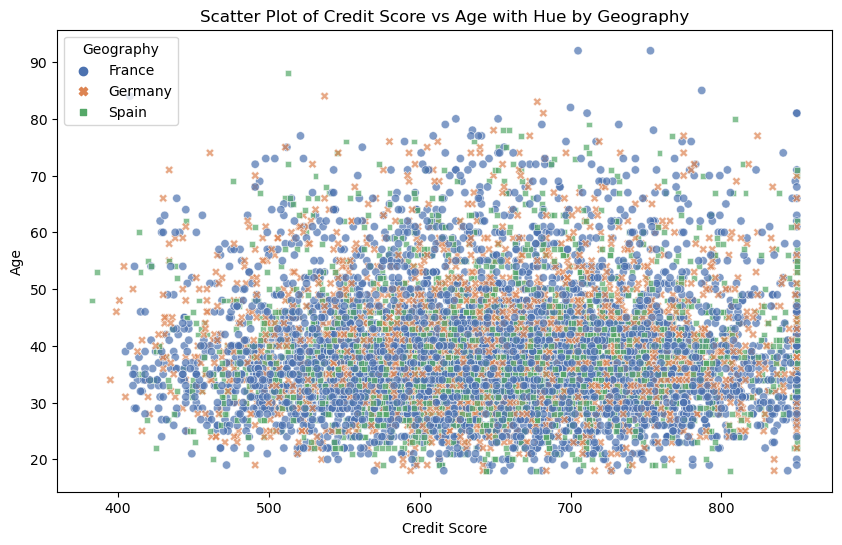

In [508]:
#alpha=0.7 adjusts the transparency of the markers to 70%, making the plot easier to read when points overlap
#style='Geography' changes the marker style based on the Geography column.
#The palette parameter allows you to specify the color palette for different categories.
#the plot shows taht frnace geegraphy has the higest clints
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Sales_Rec, x='CreditScore', y='Age', hue='Geography', style='Geography', alpha=0.7, palette='deep')

plt.title('Scatter Plot of Credit Score vs Age with Hue by Geography')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

# Section 3c: Scaling

In [509]:
#Scaling transforms your data so that each feature contributes equally to the model, Feature scaling does not change the shape of the distribution of data; rather, it rescales the range of the features while preserving their relative relationships.
#Min-Max Scaling transforms the data to a fixed range, usually 0 to 1.
#scaler = MinMaxScaler() initializes the MinMax scaler, Dscale code helps to specify all the coloumns that requires scaling

#The below code helps to initiate the MinMaxScaler, Scaled the data, Transfer the data thereby creating the data in a dataframe format
scaler=MinMaxScaler()
Dscale=Sales_Rec[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
Sec_Scale=scaler.fit_transform(Dscale)
print(Sec_Scale)
Return_DataFrame=pd.DataFrame(Sec_Scale, columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])


[[0.50535332 0.32432432 0.2        0.         0.         0.50673489]
 [0.48179872 0.31081081 0.1        0.33403148 0.         0.56270874]
 [0.25481799 0.32432432 0.8        0.63635718 0.66666667 0.56965435]
 ...
 [0.69807281 0.24324324 0.7        0.         0.         0.21039009]
 [0.83297645 0.32432432 0.3        0.29922631 0.33333333 0.46442905]
 [0.875803   0.13513514 0.4        0.51870777 0.         0.19091423]]


In [510]:
#Checking dataframe of scaled data
Return_DataFrame.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
9980,0.830835,0.283784,0.5,0.000000,0.333333,0.481341
9981,0.284797,0.229730,1.0,0.228657,0.000000,0.508490
9982,0.698073,0.243243,0.7,0.000000,0.000000,0.210390
9983,0.832976,0.324324,0.3,0.299226,0.333333,0.464429
9984,0.875803,0.135135,0.4,0.518708,0.000000,0.190914


In [511]:
#Returning the Scaled data into the dataFrame
for dat in Return_DataFrame.columns:
    Sales_Rec[dat]=Return_DataFrame[dat]


# Section 3d: Encoding

In [512]:
#Binary encoding is a process where categorical data is converted into binary format, 
#which is especially useful for machine learning algorithms. Unlike one-hot encoding, 
#which can result in a large number of features when the number of categories is high, 
#binary encoding reduces dimensionality by converting categories to binary digits.

In [513]:
#First Line initializes the binary encoder for the Geography column.
#Second line applies the encoder to the DataFrame and returns the transformed DataFrame.

binary_encoder = ce.BinaryEncoder(cols=['Geography','Gender','HasCrCard','IsActiveMember'])
Sales_Rec_binary_encoded = binary_encoder.fit_transform(Sales_Rec)
print(Sales_Rec_binary_encoded)

      index  RowNumber  CustomerId    Surname  CreditScore  Geography_0  \
0         0        1.0  15634602.0   Hargrave     0.505353            0   
1         1        2.0  15647311.0       Hill     0.481799            1   
2         2        3.0  15619304.0       Onio     0.254818            0   
3         3        4.0  15701354.0       Boni     0.676660            0   
4         4        5.0  15737888.0   Mitchell     1.000000            1   
...     ...        ...         ...        ...          ...          ...   
9980   9995     9996.0  15606229.0   Obijiaku     0.830835            0   
9981   9996     9997.0  15569892.0  Johnstone     0.284797            0   
9982   9997     9998.0  15584532.0        Liu     0.698073            0   
9983   9998     9999.0  15682355.0  Sabbatini     0.832976            1   
9984   9999    10000.0  15628319.0     Walker     0.875803            0   

      Geography_1  Gender_0  Gender_1       Age  Tenure   Balance  \
0               1         0   

In [514]:
#Returning the encoded data into the dataFrame
Sales_Rec=Sales_Rec_binary_encoded

In [515]:
Sales_Rec

,index,RowNumber,CustomerId,Surname,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Churn
0,0,1.0,15634602.0,Hargrave,0.505353,0,1,0,1,0.324324,0.2,0.000000,0.000000,0.506735,0,1,0,1,1.0
1,1,2.0,15647311.0,Hill,0.481799,1,0,0,1,0.310811,0.1,0.334031,0.000000,0.562709,1,0,0,1,0.0
2,2,3.0,15619304.0,Onio,0.254818,0,1,0,1,0.324324,0.8,0.636357,0.666667,0.569654,0,1,1,0,1.0
3,3,4.0,15701354.0,Boni,0.676660,0,1,0,1,0.283784,0.1,0.000000,0.333333,0.469120,1,0,1,0,0.0
4,4,5.0,15737888.0,Mitchell,1.000000,1,0,0,1,0.337838,0.2,0.500246,0.000000,0.395400,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9995,9996.0,15606229.0,Obijiaku,0.830835,0,1,1,0,0.283784,0.5,0.000000,0.333333,0.481341,0,1,1,0,0.0
9981,9996,9997.0,15569892.0,Johnstone,0.284797,0,1,1,0,0.229730,1.0,0.228657,0.000000,0.508490,0,1,0,1,0.0
9982,9997,9998.0,15584532.0,Liu,0.698073,0,1,0,1,0.243243,0.7,0.000000,0.000000,0.210390,1,0,0,1,1.0
9983,9998,9999.0,15682355.0,Sabbatini,0.832976,1,1,1,0,0.324324,0.3,0.299226,0.333333,0.464429,0,1,1,0,1.0


In [516]:
#Dropping the index coloum
Sales_Rec.drop(Sales_Rec.columns[0:1],inplace = True, axis=1)


In [517]:
Sales_Rec

,RowNumber,CustomerId,Surname,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Churn
0,1.0,15634602.0,Hargrave,0.505353,0,1,0,1,0.324324,0.2,0.000000,0.000000,0.506735,0,1,0,1,1.0
1,2.0,15647311.0,Hill,0.481799,1,0,0,1,0.310811,0.1,0.334031,0.000000,0.562709,1,0,0,1,0.0
2,3.0,15619304.0,Onio,0.254818,0,1,0,1,0.324324,0.8,0.636357,0.666667,0.569654,0,1,1,0,1.0
3,4.0,15701354.0,Boni,0.676660,0,1,0,1,0.283784,0.1,0.000000,0.333333,0.469120,1,0,1,0,0.0
4,5.0,15737888.0,Mitchell,1.000000,1,0,0,1,0.337838,0.2,0.500246,0.000000,0.395400,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9996.0,15606229.0,Obijiaku,0.830835,0,1,1,0,0.283784,0.5,0.000000,0.333333,0.481341,0,1,1,0,0.0
9981,9997.0,15569892.0,Johnstone,0.284797,0,1,1,0,0.229730,1.0,0.228657,0.000000,0.508490,0,1,0,1,0.0
9982,9998.0,15584532.0,Liu,0.698073,0,1,0,1,0.243243,0.7,0.000000,0.000000,0.210390,1,0,0,1,1.0
9983,9999.0,15682355.0,Sabbatini,0.832976,1,1,1,0,0.324324,0.3,0.299226,0.333333,0.464429,0,1,1,0,1.0


In [518]:
#Drop unwanted coloums 
Sales_Rec = Sales_Rec.drop(columns=['CustomerId','Surname'])

In [519]:
Sales_Rec

,RowNumber,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Churn
0,1.0,0.505353,0,1,0,1,0.324324,0.2,0.000000,0.000000,0.506735,0,1,0,1,1.0
1,2.0,0.481799,1,0,0,1,0.310811,0.1,0.334031,0.000000,0.562709,1,0,0,1,0.0
2,3.0,0.254818,0,1,0,1,0.324324,0.8,0.636357,0.666667,0.569654,0,1,1,0,1.0
3,4.0,0.676660,0,1,0,1,0.283784,0.1,0.000000,0.333333,0.469120,1,0,1,0,0.0
4,5.0,1.000000,1,0,0,1,0.337838,0.2,0.500246,0.000000,0.395400,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9996.0,0.830835,0,1,1,0,0.283784,0.5,0.000000,0.333333,0.481341,0,1,1,0,0.0
9981,9997.0,0.284797,0,1,1,0,0.229730,1.0,0.228657,0.000000,0.508490,0,1,0,1,0.0
9982,9998.0,0.698073,0,1,0,1,0.243243,0.7,0.000000,0.000000,0.210390,1,0,0,1,1.0
9983,9999.0,0.832976,1,1,1,0,0.324324,0.3,0.299226,0.333333,0.464429,0,1,1,0,1.0


# Section 4a: Combine results from Section 3b (scatter plots) and Section 3c (scaling)

C:\Users\ofonn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(9.444444444444445, 0.5, 'Estimated Salary')

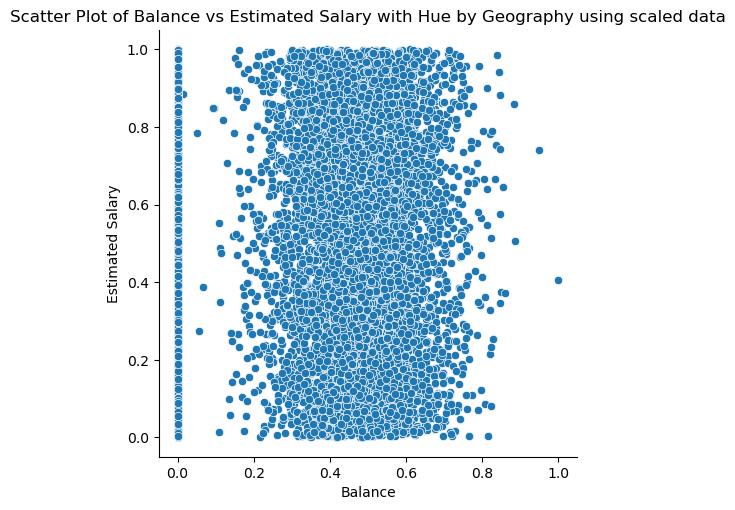

In [520]:
#Section 4a
sns.relplot(data=Sales_Rec, x='Balance', y='EstimatedSalary', kind='scatter')

# Add title and labels
plt.title('Scatter Plot of Balance vs Estimated Salary with Hue by Geography using scaled data')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')

# Section 4b: Compute the correlation among all independent features and visualize it using a heatmap.

In [521]:
#To compute the correlation among independent variables, the data has to be separated. 
# y is dependent variable and X is set of independent variables.

#Here Chrun is dependent variable because its value depends on all the other factors in the dataframe
y = Sales_Rec['Churn']   


# Load X Variables into a Pandas Dataframe with columns: the below calls all the other columns in the data frame into X(Independent Variable) without calling the churn because it is drop
X = Sales_Rec.drop(['Churn'], axis = 1)

#Now y will have only chrun column and X will have all the other columns
print(y.shape)
print(X.shape)


(9985,)
(9985, 15)


In [522]:
#Correllation among independent variable: The below output shows the correlation among all the independent variable
mymatrix = X.corr()
mymatrix

,RowNumber,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,1.000000,0.005145,-0.007747,0.009840,0.017509,-0.017509,0.000555,-0.006604,-0.007829,0.008946,-0.005876,-0.000806,0.000806,-0.011175,0.011175
CreditScore,0.005145,1.000000,0.009893,-0.005683,-0.003613,0.003613,-0.002000,-0.000643,0.007077,0.012318,0.001609,0.003949,-0.003949,-0.023622,0.023622
Geography_0,-0.007747,0.009893,1.000000,-0.575395,-0.007056,0.007056,0.039579,0.003480,0.230750,-0.002339,0.003015,0.002666,-0.002666,0.003010,-0.003010
Geography_1,0.009840,-0.005683,-0.575395,1.000000,-0.016655,0.016655,0.001711,-0.003920,0.135561,-0.008532,0.007063,-0.013944,0.013944,0.016599,-0.016599
Gender_0,0.017509,-0.003613,-0.007056,-0.016655,1.000000,-1.000000,-0.027307,0.014990,0.012526,-0.020972,-0.007905,-0.005887,0.005887,-0.022004,0.022004
Gender_1,-0.017509,0.003613,0.007056,0.016655,-1.000000,1.000000,0.027307,-0.014990,-0.012526,0.020972,0.007905,0.005887,-0.005887,0.022004,-0.022004
Age,0.000555,-0.002000,0.039579,0.001711,-0.027307,0.027307,1.000000,-0.010187,0.028466,-0.029773,-0.007941,0.011702,-0.011702,-0.085773,0.085773
Tenure,-0.006604,-0.000643,0.003480,-0.003920,0.014990,-0.014990,-0.010187,1.000000,-0.011851,0.013043,0.008336,-0.022398,0.022398,0.028291,-0.028291
Balance,-0.007829,0.007077,0.230750,0.135561,0.012526,-0.012526,0.028466,-0.011851,1.000000,-0.305995,0.012513,0.015180,-0.015180,0.009726,-0.009726
NumOfProducts,0.008946,0.012318,-0.002339,-0.008532,-0.020972,0.020972,-0.029773,0.013043,-0.305995,1.000000,0.014649,-0.003163,0.003163,-0.010379,0.010379


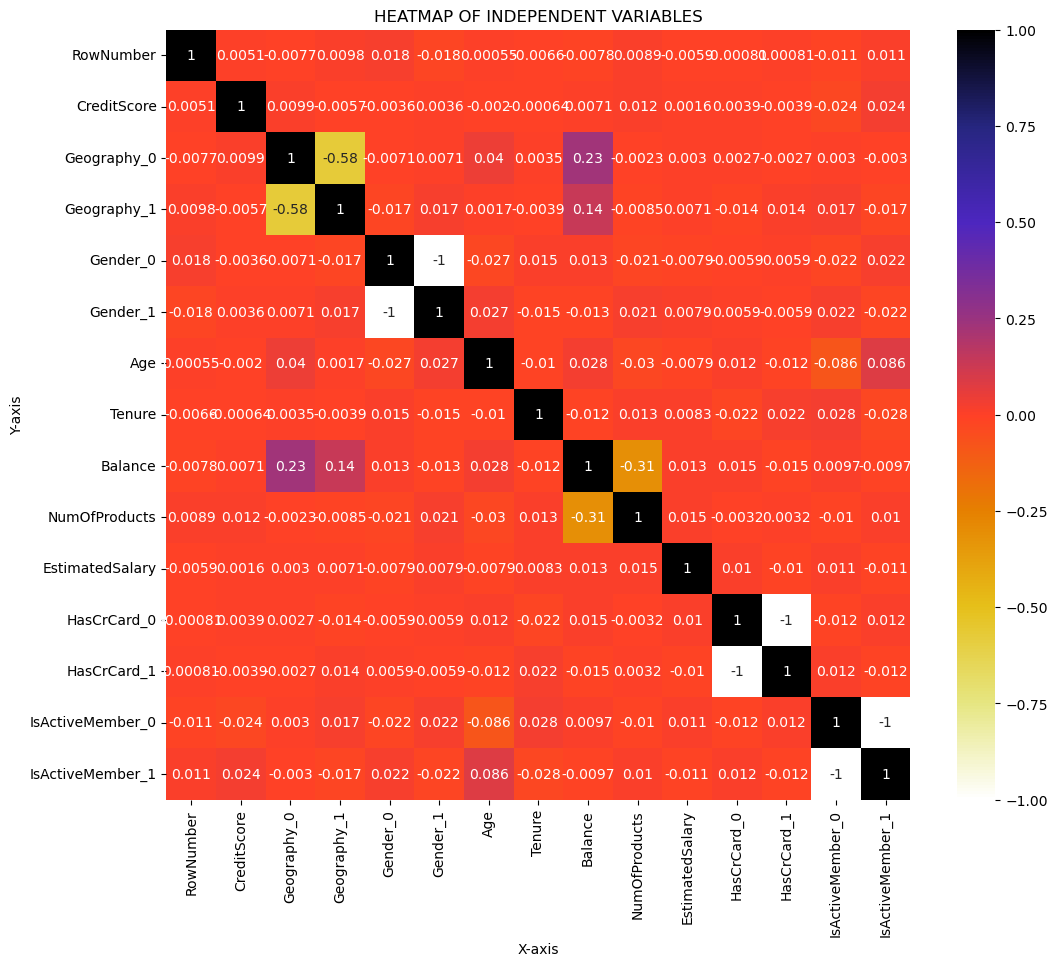

In [523]:
corr_matrix = X.corr()
plt.figure(figsize=(12,10))

#plot using heatmap: this plot shows the relationship between all the indpendent variable. 
# Negative correlation value means increase in one variable causes a reduction in the other variable
# Positive correlation value means increase in one variable causes an increase in the other variable 
# Zero correlation value means there is no relationship between the two variable
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r,annot=True)
plt.title('HEATMAP OF INDEPENDENT VARIABLES')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

# SECTION 4C:Compute the correlation of each independent feature with the dependent variable ('Churn').


In [524]:
#Step1-- find corr of X with y 
corr_with_target = X_train.corrwith(y_train)

#print the correlation
corr_with_target

#Positive correlation coefficients (values closer to 1) 
#indicate a positive linear relationship, 
#meaning that as the feature increases, the target variable also tends to increase.

#Negative correlation coefficients (values closer to -1) 
#indicate a negative linear relationship,
#meaning that as the feature increases, the target variable tends to decrease.

#Correlation coefficients close to zero indicate little to no linear relationship 
#between the feature and the target variable.

RowNumber          -0.016642
CreditScore        -0.017823
Geography_0         0.102167
Geography_1         0.050973
Gender_0           -0.101831
Gender_1            0.101831
Age                 0.283208
Tenure             -0.011445
Balance             0.116681
NumOfProducts      -0.050345
EstimatedSalary     0.006889
HasCrCard_0         0.005998
HasCrCard_1        -0.005998
IsActiveMember_0    0.148349
IsActiveMember_1   -0.148349
dtype: float64

# Section 4d: Select the 5 most important independent features based on the correlation with the dependent variable

In [525]:
#Step2--- Select features which are most correlated 

#sorts the correlation values in descending order, 
#meaning that features with higher positive correlations will appear first.
num_features = 5
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()

#EXPLAINATION OF ABOVE CODE*********
#corr_with_target.sort_values(ascending=False): This sorts the correlation values in descending order
#.head(num_features): This selects the top num_features features from the sorted list.
#.index.tolist(): This retrieves the index labels of the selected features and converts them list.

#print the slected features which are most correlated
selected_features

['Age', 'IsActiveMember_0', 'Balance', 'Geography_0', 'Gender_1']

# Section 5a & b:Treat 'Churn' column as the prediction variable. b. Use 80% of the dataset for training

In [526]:
#Step1--- Split data into training and testing ( for both X and y) 
# splits the data into training and testing sets.
#test_size=0.20 means 20% of the data will be used for testing and 80% for training.
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size=0.20)  



# Display the results
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)
#verify the shapes of training and testing dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


X_train:
      RowNumber  CreditScore  Geography_0  Geography_1  Gender_0  Gender_1  \
2987     2997.0     0.740899            1            0         0         1   
6809     6819.0     0.674518            0            1         1         0   
335       337.0     0.591006            1            1         0         1   
1546     1551.0     0.548180            1            0         0         1   
7941     7951.0     0.284797            1            1         0         1   
...         ...          ...          ...          ...       ...       ...   
9435     9450.0     0.599572            1            1         1         0   
6857     6867.0     0.625268            1            0         1         0   
5769     5779.0     0.306210            0            1         0         1   
6477     6487.0     0.700214            0            1         1         0   
8637     8648.0     0.130621            0            1         1         0   

           Age  Tenure   Balance  NumOfProducts  Estim

# Section 5c: Apply feature selection method using SelectKBest()

In [527]:
from sklearn.feature_selection import SelectKBest, f_classif


In [528]:
#This code will initiate the SelectKBest from the dataframe, k=5 will reduced the dataset to 5 columns based on their performance in predicting chrun
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [529]:
# Get the column names of the selected features
#from the output it is observed that the output in 4d is different from the ouput in 5c. 
#4d was selecting output based on the correlation coeeficient, while selectKbest selected the 5 column based on their scoring function to churn
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Gender_1', 'Age', 'Balance', 'IsActiveMember_0', 'IsActiveMember_1'], dtype='object')

In [530]:
#Displaying the result for the selected features using SelectKBest
print("Selected features:", selected_features)
print("\nX_train selected features:")
print(X_train[selected_features])
print("\nX_test selected features:")
print(X_test[selected_features])

Selected features: Index(['Gender_1', 'Age', 'Balance', 'IsActiveMember_0', 'IsActiveMember_1'], dtype='object')

X_train selected features:
      Gender_1       Age   Balance  IsActiveMember_0  IsActiveMember_1
2987         1  0.364865  0.363060                 1                 0
6809         0  0.310811  0.361124                 0                 1
335          1  0.189189  0.601534                 0                 1
1546         1  0.486486  0.000000                 0                 1
7941         1  0.202703  0.553404                 0                 1
...        ...       ...       ...               ...               ...
9435         0  0.135135  0.492926                 0                 1
6857         0  0.189189  0.786920                 0                 1
5769         1  0.243243  0.000000                 1                 0
6477         0  0.297297  0.000000                 1                 0
8637         0  0.337838  0.000000                 0                 1

[7988 

In [531]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [532]:
#RandomForestClassifier is used for classification of tasks, including data preprocessing, model training, and evaluation
#Estimation target is at 100% using n_estimator 
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#Predict the target values for the test set using the below code
y_pred = clf.predict(X_test)

# Evaluate the model to check how accurate the model can be rely upon
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


<h3 style='color:red'> # Comments </h3>
<h4 style='color:red'> 1) Section 1 (10 marks)  </h4>
<h5 style='color:blue'> 
You have addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Analyse data types of features and verify they hold data same as that of their 
datatype. Update if required. Process only appropriate ‘object’ columns 
(having categorical data) to ‘category’ type. <br>
----- You have analysed the data types of all the features, given comments, but can be more informative on type of data. <br>
    ----- Changed object data types to appropriate. Well done!! <br>
    b. First, check for Nan values in data and then remove null values for ‘Tenure’ column using mean() applied to it.<br>
----- Nan Values have been handled correctly,comments given. <br>
</h5>
<h5 style='color:green'>
<u> Marks scored:  10 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 2) Section 2 (20 marks)  </h4>
<h5 style='color:blue'>       Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Check for duplicates, view duplicated rows, and remove them, if any. <br>    
----- Duplicates checked and comments given that there are no duplicates. <br>
<br>b. Check for outliers using boxplot and statistical method, and remove them, if any. <br>    
----- Outliers checked and removed, informative comments given. <br>
<br>c. For categorical features, draw countplot. Write your observations. <br>    ----- Countplot for categorical features has drawn. Also, expected the observations are given well. <br>
<br>d. For numeric features, draw a histogram.Compute and about skewness of variables and apply transformation function, if needed. <br>
---- The code correctly draws histograms for many features using Seaborn's displot() function use with KDE and bins parameter, well done.<br>
    ----- Comments given.

<h5 style='color:green'>
<u> Marks scored: 20</u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 3) Section 3 (20 marks)   </h4>
<h5 style='color:blue'>   Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br> a. Come up with joint plot with hue parameter for two pairs of variables. Write your observations from the plot     
<br>---- The provided code creates a joint plot. Observations given well. 
    <br>
<br> b. Come up with scatter plot with hue parameter for same two pairs of variables. Write how scatter plot and joint plot are different from each other.
<br>
            <br>c. Apply any scaling method to for all numeric features.    
<br>---- Scaling done for numeric features, commented well.<br>
<br>d. Process non-numeric features to either delete a column or convert them into numeric ones using appropriate encoding techniques.    
<br>----The code successfully achieves the task of converting non-numeric features into numeric ones using the binary encoding technique, could try label encoder as well.<br>
    <br>
<h5 style='color:green'>
<u> Marks scored:  18 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 4) Section 4: (5 marks) </h4>
<h5 style='color:blue'><br>  
<br> Combine results of section 3 (b) and section 3 (c) and then compute correlation among all independent features and demonstrate it using heatmap. Compute correlation of each independent feature with dependent variable ‘Churn’. Select 5 most important independent features from the set. <br>    
<br> ---- The code seems to correctly compute the correlation matrix among independent features and visualize it using a heatmap. <br>
        ----- Selected 5 features.<br>
    ----- Comments are given.<br>

<h5 style='color:green'>                                  
<u> Marks scored: 5 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 5) Section 5: (5 marks) </h4>
<h5 style='color:blue'> <br>   
<br>Consider ‘Churn’ column is prediction variable. The dataset consists of  19,237 samples and we need to use 80% data for training and use it for feature selection. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 5 features.<br>    
    ----- Excellent attempt, well commented.<br>

<h5 style='color:green'>
<u> Marks scored: 5 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

<u> Total Marks scored: 58 </u><br>
    <br>
<b> CONGRATULATIONS!!! <br>
You have successfully completed your capstone project. <br>
You will receive your certificate from the LMS team. </b><br>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

Refer to __[https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)__  for more details of Feature Selection.